In [184]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
import numpy as np

class Data:
    """ A util class to store the training and test datasets. """
    verbose = False
    
    def __init__(self, tr_explanatory: pd.DataFrame, tr_explained: pd.DataFrame, 
                test_explanatory: pd.DataFrame, test_explained: pd.DataFrame):
        
        self.tr_explanatory = tr_explanatory
        self.tr_explained = tr_explained
        self.test_explanatory = test_explanatory
        self.test_explained = test_explained
    
    def consistency_check(self):
        if self.verbose:
            print("Shape EXPLANATORY (Training set): {}".format(self.tr_explanatory.shape))
            print("Shape EXPLAINED (Training set): {}".format(self.tr_explained.shape))
            print("Shape EXPLANATORY (Test set): {}".format(self.test_explanatory.shape))
            print("Shape EXPLAINED (Test set): {}".format(self.test_explained.shape))
        
        if self.tr_explanatory.shape[0] == self.tr_explained.shape[0] and \
            self.test_explanatory.shape[0] == self.test_explained.shape[0] and \
            self.tr_explanatory.shape[1] == self.test_explanatory.shape[1] :
            print("Consistent dimensions.")
            return True
        else:
            print("ERROR: Inconsistent dimensions!")
            print(self.tr_explanatory.shape[0] == self.tr_explained.shape[0])
            print(self.test_explanatory.shape[0] == self.test_explained.shape[0])
            print(self.tr_explanatory.shape[1] == self.test_explanatory.shape[1])
            return False 

In [185]:
#Load CSV file
data = pd.read_csv('../shuffle_email_spam_classification.csv')

In [186]:
data.head(), data.info(), data['Prediction'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


(  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
 0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
 1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
 2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
 3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
 4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   
 
    valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
 0       0    0               0         0         0   0    0           0  
 1       0    0               0         0         0   1    0           0  
 2       0    0               0         0         0   0    0           0  
 3       0    0               0         0         0   0    0           0  
 4       0    0               0         0         0   1    0           0  
 
 [5 rows x 3002 columns],
 None,
 Prediction
 0    3672
 1    1500
 Name

In [187]:
#Preprocessing
import collections
data_cleaned = data.drop(columns=["Email No."])

#Shuffle but keep it consistant
data_cleaned = data_cleaned.sample(frac=1, random_state=42).reset_index(drop=True)

n = data_cleaned.shape[0]
thr = math.floor(0.75 * n)

X_train = data_cleaned.iloc[:thr, :-1]
Y_train = data_cleaned.iloc[:thr, -1].reset_index(drop=True) #resetting indexes to match with X
X_test = data_cleaned.iloc[thr:, :-1]
Y_test = data_cleaned.iloc[thr:, -1].reset_index(drop=True) #resetting indexes to match with X

# #Implementing scaler because predictions are heavily inbalanced
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(yy.tr_explanatory)
X_test_scaled = scaler.transform(yy.test_explanatory)

#Converting back from ndarray to pandas dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=yy.tr_explanatory.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=yy.test_explanatory.columns)

#Data object
yy = Data(X_train_scaled_df, Y_train, X_test_scaled_df, Y_test)
yy_tr = Data(X_train_scaled_df, Y_train, X_train_scaled_df, Y_train)

yy.consistency_check() 

Consistent dimensions.


True

In [188]:
print(X_train_scaled_df.index)  # Starts from 0 (since reset earlier)
print(Y_train.index) 

RangeIndex(start=0, stop=3879, step=1)
RangeIndex(start=0, stop=3879, step=1)


In [189]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with increased max_iter balanced weight so it balances out the dataset when predicting
logreg = LogisticRegression(max_iter=1000, class_weight="balanced")

# Fit the model
logreg.fit(yy.tr_explanatory, yy.tr_explained)

#Predict the fitted data
predictions_LR = logreg.predict(yy.test_explanatory)




pred_vs_actual_LR_df = yy.test_explanatory.copy()
pred_vs_actual_LR_df["LogPredict"] = predictions_LR
pred_vs_actual_LR_df["ClassActual"] = yy.test_explained
print("All predictions: {0} \n\n\n".format(predictions_LR))
print(pred_vs_actual_LR_df)

All predictions: [0 0 0 ... 0 1 1] 



           the        to       ect       and       for        of         a  \
0    -0.481667 -0.441181 -0.150479 -0.506986  0.186363 -0.424146 -0.289887   
1     0.196605 -0.233821 -0.217311 -0.506986  0.401961 -0.100626 -0.179594   
2     0.281389 -0.337501 -0.284143 -0.343891 -0.460432 -0.424146 -0.378122   
3    -0.566451 -0.544861 -0.284143 -0.506986 -0.460432 -0.424146 -0.598708   
4    -0.481667 -0.648541 -0.284143 -0.506986 -0.460432 -0.424146 -0.400181   
...        ...       ...       ...       ...       ...       ...       ...   
1288 -0.566451 -0.337501 -0.217311 -0.506986 -0.244834 -0.424146 -0.444298   
1289 -0.227315 -0.130141 -0.284143 -0.506986  0.401961 -0.262386 -0.311946   
1290 -0.566451 -0.648541 -0.284143 -0.506986 -0.460432 -0.424146 -0.565620   
1291 -0.396883  0.491938 -0.284143  0.471584  0.186363  0.384655  0.018934   
1292 -0.312099 -0.648541 -0.284143 -0.343891 -0.676030 -0.262386 -0.499444   

           you      hou 

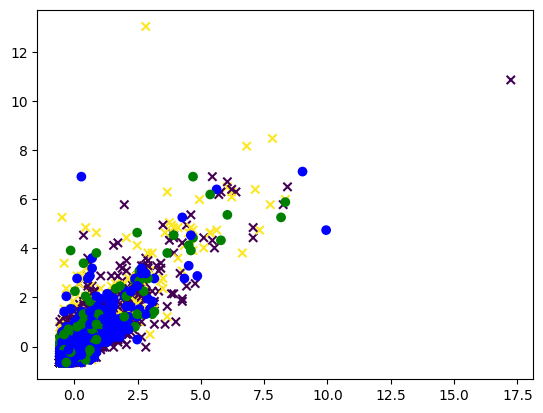

In [190]:
import matplotlib.pyplot as plt
# Visualize both the Training and the Test set
plt.scatter(yy.tr_explanatory.iloc[:, 0], yy.tr_explanatory.iloc[:, 1], c = yy.tr_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "0" 
pred_vs_actual_LR_df['CLass-Color'] = pred_vs_actual_LR_df['LogPredict'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_LR_df.iloc[:, 0], 
    pred_vs_actual_LR_df.iloc[:, 1], 
    c=pred_vs_actual_LR_df["CLass-Color"], 
    marker="o")

plt.show()

In [191]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_LR = confusion_matrix(yy.test_explained, predictions_LR)

print("Confusion matrix: \n{}".format(confusion_mtx_LR))

# Get only the Accuracy
ACC = classification_report(yy.test_explained, predictions_LR, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions_LR, output_dict=False))

Confusion matrix: 
[[867  31]
 [ 17 378]]

#####   Accuracy: 96.2877030162413 %   ##### 



              precision    recall  f1-score   support

           0       0.98      0.97      0.97       898
           1       0.92      0.96      0.94       395

    accuracy                           0.96      1293
   macro avg       0.95      0.96      0.96      1293
weighted avg       0.96      0.96      0.96      1293



In [192]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize
naive_bayes = GaussianNB()

# ################################################
# Fit the model 
naive_bayes.fit(yy.tr_explanatory, yy.tr_explained)

# ################################################
# Predict new data instances
predictions_NB = naive_bayes.predict(yy.test_explanatory)


print("All predictions: {0} \n\n\n".format(predictions_NB))
pred_vs_actual_NB_df = yy.test_explanatory.copy()
pred_vs_actual_NB_df["NBPredicted"] = predictions_NB
pred_vs_actual_NB_df["ClassActual"] = yy.test_explained
print(pred_vs_actual_NB_df)

All predictions: [0 0 1 ... 0 1 1] 



           the        to       ect       and       for        of         a  \
0    -0.481667 -0.441181 -0.150479 -0.506986  0.186363 -0.424146 -0.289887   
1     0.196605 -0.233821 -0.217311 -0.506986  0.401961 -0.100626 -0.179594   
2     0.281389 -0.337501 -0.284143 -0.343891 -0.460432 -0.424146 -0.378122   
3    -0.566451 -0.544861 -0.284143 -0.506986 -0.460432 -0.424146 -0.598708   
4    -0.481667 -0.648541 -0.284143 -0.506986 -0.460432 -0.424146 -0.400181   
...        ...       ...       ...       ...       ...       ...       ...   
1288 -0.566451 -0.337501 -0.217311 -0.506986 -0.244834 -0.424146 -0.444298   
1289 -0.227315 -0.130141 -0.284143 -0.506986  0.401961 -0.262386 -0.311946   
1290 -0.566451 -0.648541 -0.284143 -0.506986 -0.460432 -0.424146 -0.565620   
1291 -0.396883  0.491938 -0.284143  0.471584  0.186363  0.384655  0.018934   
1292 -0.312099 -0.648541 -0.284143 -0.343891 -0.676030 -0.262386 -0.499444   

           you      hou 

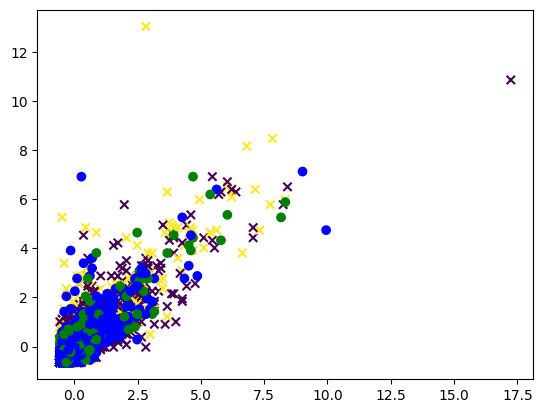

In [193]:
# Visualize both the Training and the Test set
plt.scatter(yy.tr_explanatory.iloc[:, 0], 
            yy.tr_explanatory.iloc[:, 1], 
            c = yy.tr_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "-1" 
pred_vs_actual_NB_df['CLass-Color'] = pred_vs_actual_NB_df['NBPredicted'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_NB_df.iloc[:, 0], 
    pred_vs_actual_NB_df.iloc[:, 1], 
    c=pred_vs_actual_NB_df["CLass-Color"], 
    marker="o")

plt.show()

In [194]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_NB = confusion_matrix(yy.test_explained, predictions_NB)
print("Confusion matrix: \n{}".format(confusion_mtx_NB))

# Get only the Accuracy
ACC = classification_report(yy.test_explained, predictions_NB, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions_NB, output_dict=False))

Confusion matrix: 
[[831  67]
 [ 20 375]]

#####   Accuracy: 93.27146171693735 %   ##### 



              precision    recall  f1-score   support

           0       0.98      0.93      0.95       898
           1       0.85      0.95      0.90       395

    accuracy                           0.93      1293
   macro avg       0.91      0.94      0.92      1293
weighted avg       0.94      0.93      0.93      1293



In [195]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

def run_classifiers(data, classifiers):
    
    results = pd.DataFrame(columns = ["Classifier", "Accuracy"])
    
    for cla in classifiers: 
        
        tr_explanatory = data.tr_explanatory
        test_explanatory = data.test_explanatory

        # ################################################
        cla.fit(data.tr_explanatory, data.tr_explained) # Fit the model 
        predictions = cla.predict(test_explanatory)  # Predict new data instances
        # ################################################
        confusion_mtx = confusion_matrix(data.test_explained, predictions)
        
        # Get the Accuracy
        # ACC = classification_report(data.test_explained, predictions, output_dict=True)['accuracy']
        ACC = np.sum(data.test_explained == predictions) / len(predictions)
        ACC *= 100  #in %
        
        
        cla_name =  str(type(cla)).split(".")[-1].replace(">", "").replace("'", "")
        results = pd.concat([results, pd.DataFrame([{"Classifier": cla_name, "Accuracy": ACC}])], ignore_index=True)
    
    results = results.sort_values(by=['Accuracy'], ascending=False)
    
    return results

In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

cl_list = [KNeighborsClassifier(n_neighbors=1), 
           LogisticRegression(max_iter=1000, class_weight="balanced"), 
           GaussianNB(), 
           tree.DecisionTreeClassifier(), 
           RandomForestClassifier(n_estimators=50)]

results = run_classifiers(data = yy, classifiers = cl_list)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_14136\2889533749.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{"Classifier": cla_name, "Accuracy": ACC}])], ignore_index=True)


               Classifier   Accuracy
1      LogisticRegression  96.287703
4  RandomForestClassifier  95.668987
2              GaussianNB  93.271462
3  DecisionTreeClassifier  92.111369
0    KNeighborsClassifier  87.703016


In [210]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



def evaluate_classifier(classifier, data):
    """ Run a classification algorithm 
        and evaluate its performance.
        
        "X" denotes the EXPLANATORY variables
        "Y" denotes the EXPLAINED variable
    """
    
    # Fit the model 
    classifier.fit(data.tr_explanatory, data.tr_explained)

    # Predict new data instances
    predicted = classifier.predict(data.test_explanatory)
    
    # Evaluate performance: use 'predict_proba', which works like 'predict', but returns 
    # more data, in particular the estimated probabilities for each class
    probabilities = classifier.predict_proba(data.test_explanatory)
    probabilities = probabilities[:, 1] 
    
    fpr, tpr, thresholds = roc_curve(data.test_explained, probabilities)
    auc = roc_auc_score(data.test_explained, probabilities)
    
    
    # Classification report / Accuracy
    conf_matrix = confusion_matrix(data.test_explained, predicted) 
    
    # Get the Accuracy
    ACC = classification_report(data.test_explained, predicted, output_dict=True)['accuracy']
    cl_report = classification_report(data.test_explained, predicted, output_dict=False)

    return {"ACC": ACC, "AUC": auc, "TPR": tpr, "FPR": fpr, "thresholds":thresholds, 
           "ConfusionMatrix":conf_matrix, "ClassificationReport":cl_report}
    
    # print("\n#####   Accuracy: {:.5f} %   ##### ".format(ACC*100))
    # print("#####   AUC = {:.5f}          ##### \n\n".format(auc))
    # print("Confusion matrix: \n{}".format(conf_matrix))

    # # Print all stats
    # print(cl_report)
    
    
    # # ROC plot
    # fig = plt.figure()
    # fg, ax1 = plt.subplots(1, 1, figsize=(10, 10)) 
    # ax1.set_xlim([-0.05, 1.05])
    # ax1.set_ylim([-0.05, 1.05])
    # ax1.plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    # ax1.title.set_text("ROC " + str(type(classifier)))
    # ax1.plot(fpr, tpr, marker = "", alpha = 0.8)
    # plt.show()

In [211]:
def roc_plot(classifier, results_classifier, results_tr_classifier):
    fig = plt.figure()
    fg, ax = plt.subplots(1, 1, figsize=(10, 10)) 
    
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    ax.title.set_text("ROC " + str(type(classifier)))
    
    ax.plot(results_tr_classifier["FPR"], results_tr_classifier["TPR"], marker = ".", color="red")
    ax.plot(results_classifier["FPR"], results_classifier["TPR"], marker = ".", color="darkblue")
    
    plt.show()
    
    
    print("\n#####   Accuracy Tr Set: {:.5f} % \t Accuracy Test Set: {:.5f} % \t\t ratio: {:.4f}"
          .format(results_tr_classifier["ACC"]*100, results_classifier["ACC"]*100, results_classifier["ACC"]/results_tr_classifier["ACC"]))
    
    print("#####   AUC Tr Set: = {:.5f} \t AUC Test Set: = {:.5f}\n\n"
          .format(results_tr_classifier["AUC"], results_classifier["AUC"]))
    
    print("Confusion matrix (Tr Set): \n{}".format(results_tr_classifier["ConfusionMatrix"]))
    print("Confusion matrix (Test Set): \n{}".format(results_classifier["ConfusionMatrix"]))

<Figure size 640x480 with 0 Axes>

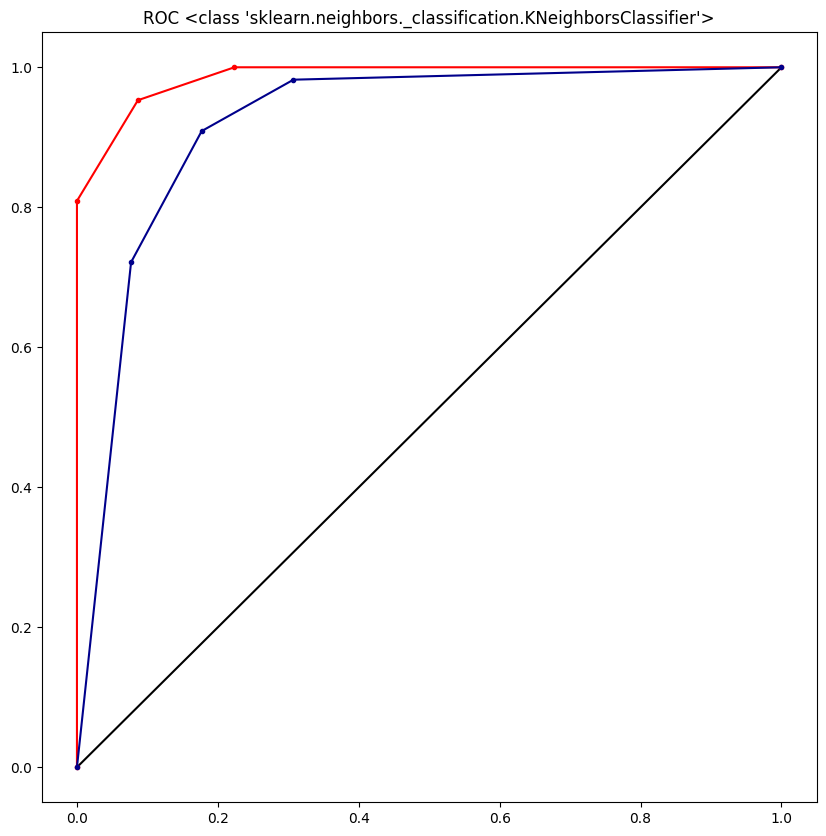


#####   Accuracy Tr Set: 92.47229 % 	 Accuracy Test Set: 84.91879 % 		 ratio: 0.9183
#####   AUC Tr Set: = 0.98648 	 AUC Test Set: = 0.91913


Confusion matrix (Tr Set): 
[[2534  240]
 [  52 1053]]
Confusion matrix (Test Set): 
[[739 159]
 [ 36 359]]


In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

kNNr = KNeighborsClassifier(n_neighbors=3)

results_tr_test = evaluate_classifier(kNNr, yy)
results_tr_tr = evaluate_classifier(kNNr, yy_tr)
roc_plot(kNNr, results_tr_test, results_tr_tr)

<Figure size 640x480 with 0 Axes>

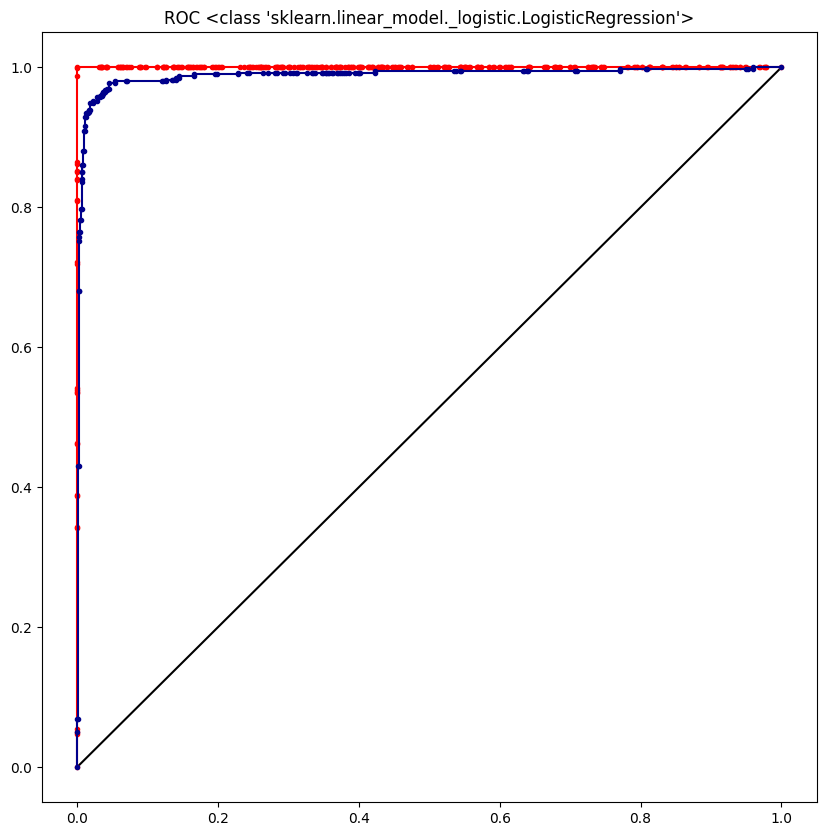


#####   Accuracy Tr Set: 99.97422 % 	 Accuracy Test Set: 97.13844 % 		 ratio: 0.9716
#####   AUC Tr Set: = 1.00000 	 AUC Test Set: = 0.98849


Confusion matrix (Tr Set): 
[[2773    1]
 [   0 1105]]
Confusion matrix (Test Set): 
[[881  17]
 [ 20 375]]


In [213]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
results_tr_test = evaluate_classifier(logreg, yy)
results_tr_tr = evaluate_classifier(logreg, yy_tr)
roc_plot(logreg, results_tr_test, results_tr_tr)

In [214]:
import numpy as np
import math 

k_folds = 10
def split_df(dataframe, k_folds = 10):
    """ 
    Returns a dictionary of the split datasets. 
    """
    ret = {}
    
    #N = len(np.array(dataframe.index))
    N = data.shape[0]  # row count
    len_segment = math.floor(N/k_folds)
    
    dataframe = dataframe.sample(frac=1).reset_index(drop=True)
        
    for i in range(0, k_folds):
        ind_from = i*len_segment
        ind_to = (i+1)*len_segment - 1

        if i == (k_folds-1):
            ind_to = N - 1
                
        training_1 = dataframe[0:ind_from]
        test_set = dataframe[ind_from:ind_to]
        training_2  = dataframe[ind_to:(N-1)]
        
        training_set = pd.concat([training_1, training_2])
        
        # Training subset
        X = training_set.iloc[:, :-1]  # Explanatory variables
        Y = training_set.iloc[:, -1]   # Target variable (the Class) 

        # Testing subset
        X_test = test_set.iloc[:, :-1]  # Explanatory variables
        Y_test = test_set.iloc[::, -1]  # Target variable (the Class) 
        
        # #############################
        # Create a Data object 
        data_obj_i = Data(X, Y, X_test, Y_test)
        data_obj_i.consistency_check()  # call the 'Consistency check' method od the class 'Data'
        # #############################
        
        ret[i] = data_obj_i
    
    # return a dictionary
    return ret
        
    
data_k_folds = split_df(data, 10)

# a quick test
print(type(data_k_folds[0].tr_explanatory.iloc[1]))

AttributeError: 'Data' object has no attribute 'shape'

In [ ]:

## PREPARE THE ROC PLOTS
# ROC plot
fig = plt.figure()
fg, axes = plt.subplots(1, 2, figsize=(20, 8)) 

axes[0].set_xlim([-0.05, 1.05])
axes[0].set_ylim([-0.05, 1.05])
axes[0].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
axes[0].title.set_text("ROC (Test set)")

axes[1].set_xlim([-0.05, 1.05])
axes[1].set_ylim([-0.05, 1.05])
axes[1].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
axes[1].title.set_text("ROC (Training set)")

    
performance_stats_df = pd.DataFrame(columns=["Fold", 
                                            "ACC Test", 
                                            "ACC Training",
                                            "ACC ratio",
                                            "AUC Test",
                                            "AUC Training",
                                            "AUC ratio", 
                                            "CONF_MTX"])


## RUN THE CLASSIFIERS
for (i, data) in data_k_folds.items():
    
    print("Process fold {}".format(i))
    #adjusting weight because the dataset is very imbalanced
    clf = RandomForestClassifier(n_estimators=50, max_depth=10, class_weight="balanced_subsample", random_state=42)
    #clf = svm.SVC(probability=True, gamma='auto')

    ####################################################
    results_tr_tr = evaluate_classifier(clf,yy_tr)

    results_tr_test = evaluate_classifier(clf, yy)
    ####################################################
    
    axes[0].plot(results_tr_test["FPR"], results_tr_test["TPR"], marker = "", color="green", alpha=0.6)
    axes[1].plot(results_tr_tr["FPR"], results_tr_tr["TPR"], marker = "", color="red", alpha=0.6)
    
    temp = {'Fold': i, 
            'ACC Test': results_tr_test["ACC"]*100, 
            'ACC Training': results_tr_tr["ACC"]*100, 
            'ACC ratio': results_tr_test["ACC"]/results_tr_tr["ACC"], 
            'AUC Test': results_tr_test["AUC"], 
            'AUC Training': results_tr_tr["AUC"], 
            'AUC ratio': results_tr_test["AUC"]/results_tr_tr["AUC"], 
            'CONF_MTX':results_tr_test["ConfusionMatrix"]}
    
    performance_stats_df = pd.concat([performance_stats_df, pd.DataFrame([temp])], ignore_index=True)
    
    
plt.show()

performance_stats_df.head(10)


In [ ]:
performance_stats_df.drop(columns=["CONF_MTX"]).mean()

In [ ]:
print(yy_tr.tr_explained.value_counts())

In [ ]:
def cross_validation(clf, dataset, k_folds=10):
    """ Encapsulate the k-fold Cross Validation procedure into this method """
    
    ### SPLIT
    data_k_folds = split_df(dataset, k_folds)

    ## PREPARE THE ROC PLOTS
    # ROC plot
    fig = plt.figure()
    fg, axes = plt.subplots(1, 2, figsize=(20, 8)) 

    axes[0].set_xlim([-0.05, 1.05])
    axes[0].set_ylim([-0.05, 1.05])
    axes[0].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    axes[0].title.set_text("ROC (Test set)")

    axes[1].set_xlim([-0.05, 1.05])
    axes[1].set_ylim([-0.05, 1.05])
    axes[1].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    axes[1].title.set_text("ROC (Training set)")


    performance_stats_df = pd.DataFrame(columns=["Fold", 
                                                "ACC Test", "ACC Training", "ACC ratio",
                                                "AUC Test", "AUC Training", "AUC ratio", 
                                                "CONF_MTX"])

    ## RUN THE CLASSIFIERS
    for (i, data) in data_k_folds.items():
        print("Process fold {}".format(i))

        ####################################################
        results_tr_tr = evaluate_classifier(clf, yy_tr)

        results_tr_test = evaluate_classifier(clf, yy)
        ####################################################

        axes[0].plot(results_tr_test["FPR"], results_tr_test["TPR"], marker = "", color="green", alpha=0.6)
        axes[1].plot(results_tr_tr["FPR"], results_tr_tr["TPR"], marker = "", color="red", alpha=0.6)

        temp = {'Fold': i, 
                'ACC Test': results_tr_test["ACC"]*100, 
                'ACC Training': results_tr_tr["ACC"]*100, 
                'ACC ratio': results_tr_test["ACC"]/results_tr_tr["ACC"], 
                'AUC Test': results_tr_test["AUC"], 
                'AUC Training': results_tr_tr["AUC"], 
                'AUC ratio': results_tr_test["AUC"]/results_tr_tr["AUC"], 
                'CONF_MTX':results_tr_test["ConfusionMatrix"]}

        performance_stats_df = pd.concat([performance_stats_df, pd.DataFrame([temp])], ignore_index=True)

    plt.show()
    
    return performance_stats_df

In [ ]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

_deg = 2
poly_fe_obj = PolynomialFeatures(degree = 1).fit(data_cleaned)
polynomial_fe = poly_fe_obj.transform(data_cleaned)

polynomial_fe = pd.DataFrame(polynomial_fe)

In [ ]:
performance_stats_df = cross_validation(RandomForestClassifier(n_estimators=50), polynomial_fe, k_folds=10)

performance_stats_df.head(10) 